# Sharpe Ratio Project for DIG
#### In this project we aim to answer the question of how our investment decisions affect our Sharpe Ratio historically
We will address this question by utilizing data provided by the DIG purchase history, the yahoo finance data base, and the 3 month Treasury Bill Rates. What does this mean? Essentially we are going to look at each time we changed the DIG portfolio over its lifetime, then find whatever the 5yr Sharpe Ratio is of that specific portfolio at that specific time, then we will repeat this for all dates we changed the portfolio. So at the end we will have a series of Sharpe Ratios, and see how they have increased or decreased over time. 

To provide an overview, we will:

### 1
Gather necessary Data for purchase history, t-bill rates, and the stock prices of each holding from 5 years before the inception of the portfolio. We have already calculated the weights of each stock at each time in an excel file which is available upon request.

### 2
Take the pricing data and use it to find the 5-year historical Sharpe ratio of the portfolio at each time we change the portfolio.

### 3 
Consider the Sharpe Ratio changes with time specific t-bill rates, constant t-bill rates, and then a t-bill rate of 0. This is more so to see the impact of rates on the metric (higher rates and low returns = low or even negative ratio).

### 4 
Then we will work to find the returns of the portfolio and attempt to find the sharpe ratio using the data specific to the portfolio. 

### 5 
Hopefully not delete this file like I did the last one 

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
weights = pd.read_csv("Weights.csv")
rates = pd.read_csv("DTB3.csv")

In [3]:
weights = weights.drop(columns = {'Unnamed: 0'})

In [4]:
rates['Date'] = pd.to_datetime(rates['DATE']).dt.strftime('%m/%d/%Y')
rates=rates.drop(columns = {'DATE'})
weights = pd.merge(weights, rates, on='Date', how='inner')
weights.rename(columns={'DTB3': 'Rate'}, inplace=True)

In [5]:
weights['Rate'] = pd.to_numeric(weights['Rate'])

In [6]:
weights.tail() 

,Date,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,...,SCHW,VDIGX,VOO,VTV,RING,NLR,FLUT,BLD,SNOW,Rate
26,11/08/2023,0.041417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025251,0.109982,0.375691,0.090079,0.000000,0.000000,0.000000,0.000000,0.000000,5.28
27,11/17/2023,0.038834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023617,0.101274,0.414500,0.083638,0.000000,0.000000,0.000000,0.000000,0.000000,5.25
28,11/30/2023,0.038989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025121,0.102182,0.413283,0.083712,0.023405,0.023405,0.000000,0.000000,0.000000,5.25
29,12/28/2023,0.039649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027126,0.100410,0.410876,0.083345,0.022291,0.021457,0.000000,0.000000,0.000000,5.25
30,03/14/2024,0.034204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021547,0.087682,0.368301,0.073151,0.000000,0.018054,0.028165,0.028165,0.035207,5.25


In [7]:
tickers = weights.columns.tolist()
tickers = tickers[1:-1]

In [8]:
### now we will get the log returns for all the holdings 
start_date = (pd.to_datetime(weights['Date'][0]) - pd.DateOffset(years = 5))
end_date = pd.to_datetime(weights['Date'].iloc[-1])

log_returns = pd.DataFrame(columns = tickers)

for i in tickers:
    holding = yf.Ticker(i)
    holding_data = holding.history(interval='1d', start=start_date, end=end_date)
    holding_close = holding_data['Close']
    log_returns[i] = np.log(holding_close).diff().dropna()


    
    
log_returns = log_returns.fillna(0)

In [9]:
log_returns.reset_index(inplace=True)

log_returns['Date'] = log_returns['Date'].dt.strftime('%m/%d/%Y')

In [10]:
log_returns.head()

,Date,RSP,NUMG,VBK,VBR,VWO,XLRE,DECK,AMD,SCHG,...,PSA,SCHW,VDIGX,VOO,VTV,RING,NLR,FLUT,BLD,SNOW
0,03/08/2016,-0.016547,0.0,-0.023416,-0.021415,-0.017549,-0.001510,-0.015757,-0.071309,-0.012689,...,-0.006607,-0.031737,-0.004040,-0.011315,-0.011659,-0.043460,0.002123,0.0,-0.020853,0.0
1,03/09/2016,0.005283,0.0,0.003941,0.005422,0.006390,-0.003062,-0.013883,-0.017544,0.003784,...,0.003889,-0.004510,0.003592,0.005482,0.005598,0.004791,0.004233,0.0,0.028518,0.0
2,03/10/2016,0.001448,0.0,-0.007105,-0.002452,-0.002429,-0.004726,-0.001062,0.000000,-0.000199,...,0.000440,0.003384,-0.000449,0.000546,0.000000,0.040965,-0.012752,0.0,-0.010468,0.0
3,03/11/2016,0.018633,0.0,0.021251,0.018846,0.021655,0.022988,0.021729,0.108894,0.019101,...,0.026914,0.056908,0.013363,0.016099,0.015754,-0.022030,0.007246,0.0,0.023914,0.0
4,03/14/2016,-0.001421,0.0,-0.000776,-0.003822,-0.005669,0.003232,-0.019252,0.076373,0.000390,...,0.017832,-0.012848,-0.000443,-0.001507,-0.002568,-0.029746,0.001273,0.0,-0.007218,0.0


## 2 
Now that we have the historical returns of the stocks in our portfolio, we need to define our function to get the historical Sharpe Ratios at each point in time. We recall the formula for the Sharpe Ratio : $$ \text{Sharpe Ratio}_i = \frac{R_p - R_f}{\sigma_p}$$ Where $R_p$ is the mean log return of the portfolio over 5 years, $R_f$ is the designated risk free rate of return, and $\sigma_p$ is the standard deviation of the portfolio in that five year interval.

In [48]:
def get_sharpes(weights,log_returns, rf_rate = None):
    weight_raw = weights.drop(columns = {'Date', 'Rate'}) # this is our raw weighting 
    tickers = weights.columns.tolist()
    tickers = tickers[1:-1]
    sharpes = []
    rets = []
    risks = []
    for i in weights.index:
        if rf_rate == None:
            rf_rate = weights['Rate'][i] / 100
        else: 
            rf_rate = rf_rate
            
        end_date = dt.datetime.strptime(weights['Date'][i], "%m/%d/%Y")
        start_date = end_date - dt.timedelta(days=365 * 5)
    
        log_rets = log_returns[(pd.to_datetime(log_returns['Date']) >= start_date) & 
                               (pd.to_datetime(log_returns['Date']) <= end_date)]


        mean_rets = log_rets.mean()
        cov_mat = log_rets.cov() * 252
        port_rets = ((weight_raw.iloc[i]* mean_rets).sum()+1)**252 - 1
        port_risk = np.sqrt(np.dot(weight_raw.iloc[i].T, np.dot(cov_mat, weight_raw.iloc[i])))

        sharpes.append((port_rets - rf_rate) / port_risk)
        rets.append(port_rets)
        risks.append(port_risk)
    
    complete = pd.DataFrame({'Date of Portfolio Change' : weights['Date'],
                            '5yr Log Returns' : rets,
                            '5yr Standard Deviation': risks,
                            '5yr Historical Sharpe Ratio': sharpes})
    
    return complete
    

In [49]:
full_data = get_sharpes(weights,log_returns)

/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/1191985206.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/1191985206.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/1191985206.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8b

In [50]:
full_data

,Date of Portfolio Change,5yr Log Returns,5yr Standard Deviation,5yr Historical Sharpe Ratio
0,03/05/2021,0.145946,0.196417,0.741006
1,03/25/2021,0.146213,0.196745,0.741126
2,05/20/2021,0.153941,0.197542,0.777257
3,06/18/2021,0.162415,0.199403,0.812500
4,06/28/2021,0.202089,0.204128,0.988048
5,11/18/2021,0.195008,0.203704,0.955349
6,12/14/2021,0.194581,0.192897,1.006659
7,12/15/2021,0.208007,0.194141,1.069366
8,02/18/2022,0.172385,0.201249,0.854588
9,05/18/2022,0.146370,0.224330,0.650693


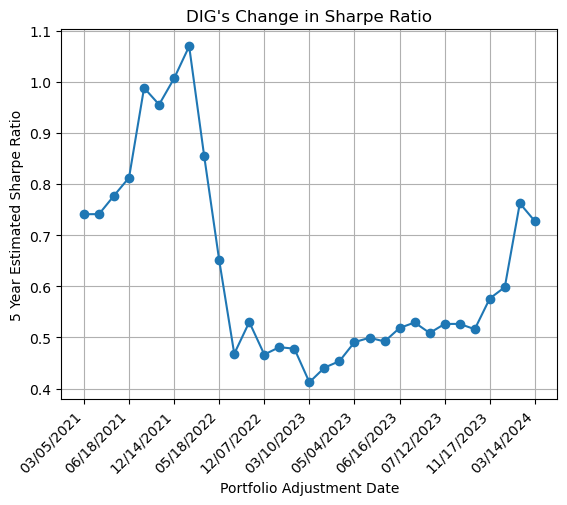

In [62]:
selected_dates = full_data['Date of Portfolio Change'][::3]
plt.plot(full_data['Date of Portfolio Change'], 
         full_data['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='-')

plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in Sharpe Ratio")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()

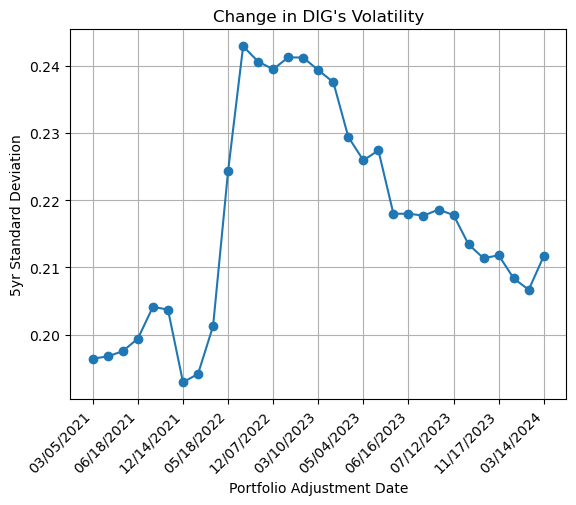

In [44]:
selected_dates = full_data['Date of Portfolio Change'][::3]
plt.plot(full_data['Date of Portfolio Change'], 
        full_data['5yr Standard Deviation'], 
         marker = 'o', linestyle = '-')
plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5yr Standard Deviation')
plt.title("Change in DIG's Volatility")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')

plt.show()

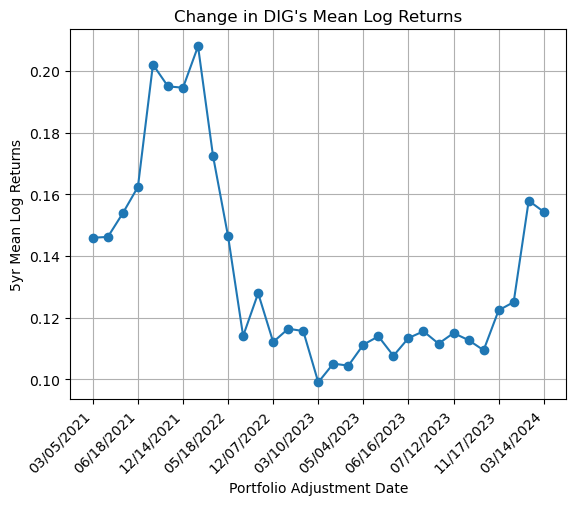

In [45]:
selected_dates = full_data['Date of Portfolio Change'][::3]
plt.plot(full_data['Date of Portfolio Change'], 
        full_data['5yr Log Returns'], 
         marker = 'o', linestyle = '-')
plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5yr Mean Log Returns')
plt.title("Change in DIG's Mean Log Returns")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')

plt.show()

## 3 
We notice a sharp decline in the sharpe ratios from early 2022 to late 2022. This could be due to the rising interest rates we experienced in that time which caused the risk free rate to rise substantially. Let's consider the cases where we have constant risk free rates. Case 1 will be the average risk free rate over the time periods, and Case 2 will be a risk free rate of 0 (a simple Sharpe Ratio)

In [17]:
# Case 1

mean_rf_rate = (weights['Rate'].mean())/100
mean_rf = get_sharpes(weights, log_returns, rf_rate = mean_rf_rate)

mean_rf

/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/3302712074.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/3302712074.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/3302712074.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8b

,Date of Portfolio Change,5yr Log Returns,5yr Standard Deviation,5yr Historical Sharpe Ratio
0,03/05/2021,0.145946,0.196417,0.569810
1,03/25/2021,0.146213,0.196745,0.570215
2,05/20/2021,0.153941,0.197542,0.607036
3,06/18/2021,0.162415,0.199403,0.643867
4,06/28/2021,0.202089,0.204128,0.823319
5,11/18/2021,0.195008,0.203704,0.790277
6,12/14/2021,0.194581,0.192897,0.832339
7,12/15/2021,0.208007,0.194141,0.896163
8,02/18/2022,0.172385,0.201249,0.687502
9,05/18/2022,0.146370,0.224330,0.500798


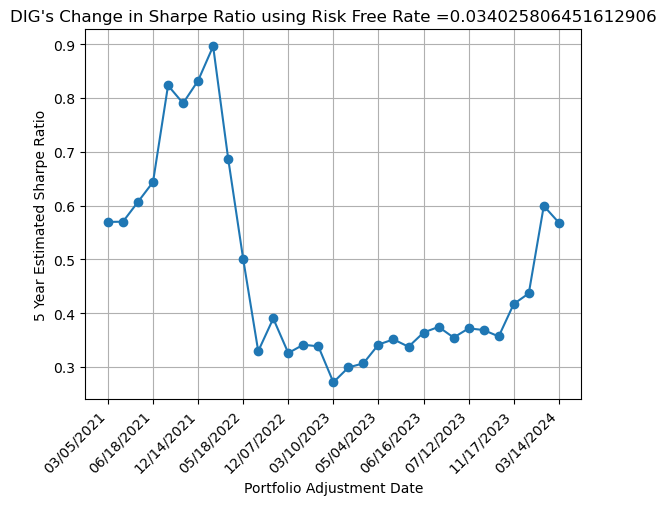

In [18]:
selected_dates = mean_rf['Date of Portfolio Change'][::3]
plt.plot(mean_rf['Date of Portfolio Change'], 
         mean_rf['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='-')

plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in Sharpe Ratio using Risk Free Rate ="+str(mean_rf_rate))
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()

In [19]:
## Case 2 

null_rf = get_sharpes(weights, log_returns, rf_rate = 0.0)

null_rf

/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/3302712074.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/3302712074.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8bpgx2d7579vrhkkyn8_z_r0000gn/T/ipykernel_52880/3302712074.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_rets = log_rets.mean()
/var/folders/zn/t8b

,Date of Portfolio Change,5yr Log Returns,5yr Standard Deviation,5yr Historical Sharpe Ratio
0,03/05/2021,0.145946,0.196417,0.743043
1,03/25/2021,0.146213,0.196745,0.743159
2,05/20/2021,0.153941,0.197542,0.779282
3,06/18/2021,0.162415,0.199403,0.814505
4,06/28/2021,0.202089,0.204128,0.990008
5,11/18/2021,0.195008,0.203704,0.957312
6,12/14/2021,0.194581,0.192897,1.008733
7,12/15/2021,0.208007,0.194141,1.071427
8,02/18/2022,0.172385,0.201249,0.856575
9,05/18/2022,0.146370,0.224330,0.652476


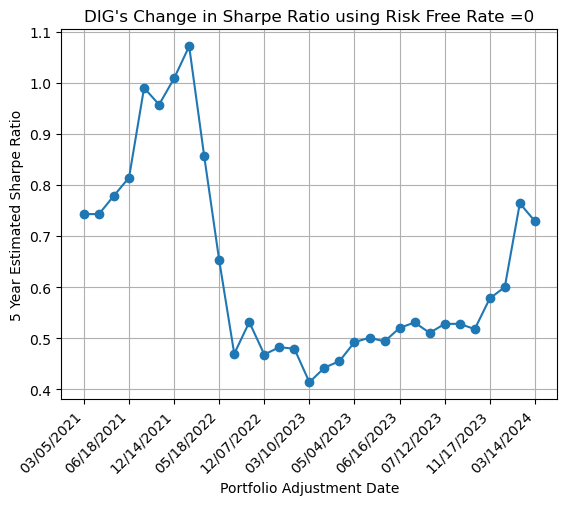

In [20]:
selected_dates = null_rf['Date of Portfolio Change'][::3]
plt.plot(null_rf['Date of Portfolio Change'], 
         null_rf['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='-')

plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in Sharpe Ratio using Risk Free Rate ="+str(0))
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()

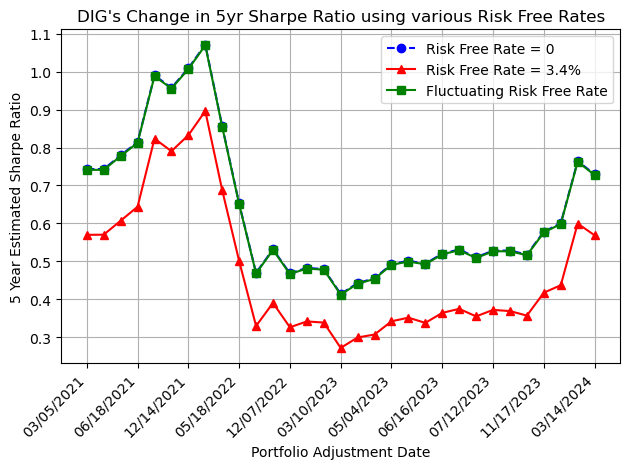

In [21]:
selected_dates = null_rf['Date of Portfolio Change'][::3]
plt.plot(null_rf['Date of Portfolio Change'], 
         null_rf['5yr Historical Sharpe Ratio'], 
         marker='o', linestyle='--', color = 'blue', label = 'Risk Free Rate = 0')

plt.plot(mean_rf['Date of Portfolio Change'], 
         mean_rf['5yr Historical Sharpe Ratio'], 
         marker='^', linestyle='-', color = 'red', label = 'Risk Free Rate = 3.4%')
plt.plot(full_data['Date of Portfolio Change'], 
         full_data['5yr Historical Sharpe Ratio'], 
         marker='s', linestyle='-', color = 'green', label = 'Fluctuating Risk Free Rate')
plt.xlabel('Portfolio Adjustment Date')
plt.ylabel('5 Year Estimated Sharpe Ratio')
plt.title("DIG's Change in 5yr Sharpe Ratio using various Risk Free Rates")
plt.grid(True)
plt.xticks(selected_dates, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

We see that whether we have alternating, constant, or a 0 Risk Free rate of return, the path of the Sharpe Ratio stays relatively the same. This can be attributted to the rise in volatility and the fall in mean returns that the DIG portfolio had experienced over this time period. I think the thing to highlight from these findings is that we have been consistently rising since late 2023 as the market has propelled us with higher returns. 

### Now let's look at DIG's own portfolio returns and see if we can find the Sharpe Ratio using the real data

In [22]:
def get_DIG_rets(weights, log_returns):
    no_rd = weights.drop(columns = {'Date', 'Rate'})
    tickers = weights.columns.tolist()
    tickers = tickers[1:-1]

    rets = [0]
    
    returns = log_returns[
        (pd.to_datetime(log_returns['Date']) >= pd.to_datetime(weights['Date'][0])) 
        & (pd.to_datetime(log_returns['Date']) <= pd.to_datetime(weights['Date'].iloc[-1]))]
    
    for i in range(1,len(no_rd)):
        r = log_returns[
        (pd.to_datetime(log_returns['Date']) >= pd.to_datetime(weights['Date'][i-1])) 
        & (pd.to_datetime(log_returns['Date']) <= pd.to_datetime(weights['Date'].iloc[i]))].sum()[1:]
        
        rets.append(sum(r*no_rd.loc[i-1]))
        
    dig_returns = pd.DataFrame({'Date': weights['Date'], 
                               'DIG Returns' : rets})
    dig_returns['Cumulative Returns'] = dig_returns['DIG Returns'].cumsum()
    dig_returns['Growth of $100'] = dig_returns['Cumulative Returns'].rolling(window=1).sum().apply(lambda x: (100 + (100*x)))
    
    return dig_returns
    

In [23]:
dig = get_DIG_rets(weights,log_returns)
dig

,Date,DIG Returns,Cumulative Returns,Growth of $100
0,03/05/2021,0.000000,0.000000,100.000000
1,03/25/2021,0.025701,0.025701,102.570105
2,05/20/2021,0.058910,0.084611,108.461107
3,06/18/2021,0.019168,0.103779,110.377928
4,06/28/2021,0.024570,0.128349,112.834913
5,11/18/2021,0.076040,0.204390,120.438951
6,12/14/2021,-0.060657,0.143732,114.373213
7,12/15/2021,0.008798,0.152530,115.253028
8,02/18/2022,-0.095084,0.057446,105.744582
9,05/18/2022,-0.116599,-0.059154,94.084632


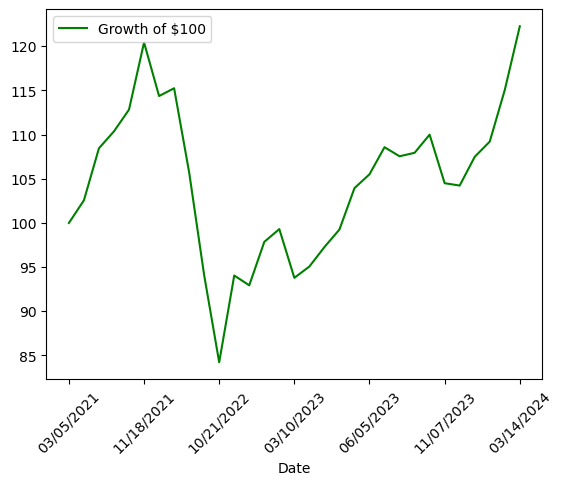

In [24]:
dig.plot(x='Date', y='Growth of $100', kind='line', color='green')
plt.xticks(rotation = 45)
plt.show()

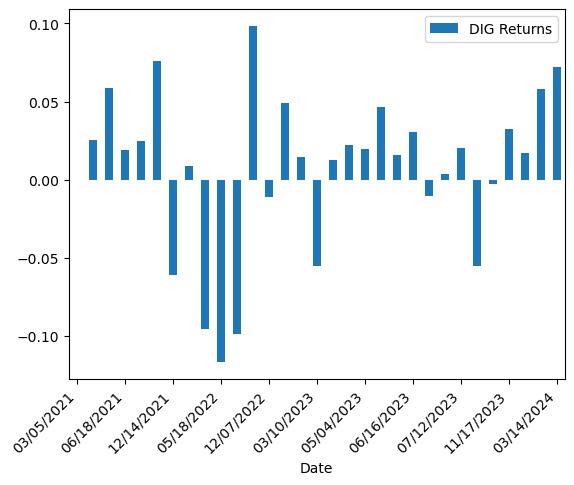

In [25]:
selected_dates = dig['Date'][::3]
dig.plot(x='Date', y='DIG Returns', kind='bar')
plt.xticks(range(0, len(dig['Date']), 3),selected_dates,rotation = 45, ha = 'right')
plt.show()

### What we've done so far is cool and somewhat accurate
I just found after doing this project (for the second time since I deleted the first file) the montly balances, returns, and dividends for the portfolio over the lifetime of the data. 

In [26]:
fidelity = pd.read_csv("Fidelity Balances.csv")

In [27]:
fidelity['Beginning Balance'] += fidelity['Deposits']
fidelity = fidelity.drop(columns = {'Deposits'})
fidelity['% Market Returns'] = (fidelity['Market Returns'] / fidelity['Beginning Balance']) *100
fidelity['% Dividend Return'] = (fidelity['Dividends & Interest'] / fidelity['Beginning Balance']) * 100
fidelity['% Monthly Return'] = fidelity['% Market Returns'] + fidelity['% Dividend Return']

In [28]:
fidelity['% Monthly Return'].sum()

24.894565894909512

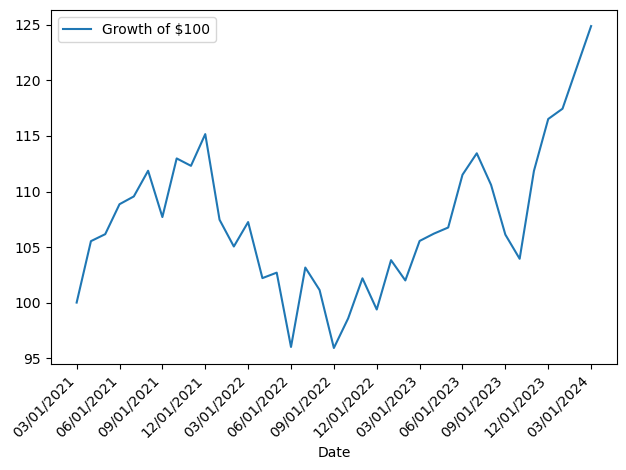

In [29]:
fidelity['Cumulative Return'] = fidelity['% Monthly Return'].cumsum()
fidelity.loc[0,'Cumulative Return'] = 0
fidelity['Growth of $100'] = fidelity['Cumulative Return'].rolling(window=1).sum().apply(lambda x: (100 + x))

selected_dates = fidelity['Date'][::3]
fidelity.plot(x='Date', y='Growth of $100', kind='line')
plt.xticks(range(0, len(fidelity['Date']), 3),selected_dates, rotation = 45, ha = 'right')
plt.tight_layout() 
plt.show()

In [30]:
fidelity

,Date,Beginning Balance,Market Returns,Dividends & Interest,Ending Balance,% Market Returns,% Dividend Return,% Monthly Return,Cumulative Return,Growth of $100
0,03/01/2021,76500.48,2073.80,124.21,78698.49,2.710833,0.162365,2.873198,0.000000,100.000000
1,04/01/2021,102198.49,2716.84,0.14,104915.47,2.658395,0.000137,2.658532,5.531730,105.531730
2,05/01/2021,104915.47,659.16,0.28,105574.91,0.628277,0.000267,0.628544,6.160274,106.160274
3,06/01/2021,107924.91,2676.28,234.48,110835.67,2.479761,0.217262,2.697023,8.857298,108.857298
4,07/01/2021,110835.67,775.07,0.12,111610.86,0.699297,0.000108,0.699405,9.556702,109.556702
5,08/01/2021,111610.86,2582.25,0.12,114193.23,2.313619,0.000108,2.313726,11.870429,111.870429
6,09/01/2021,114193.23,-5041.26,279.99,109431.96,-4.414675,0.245190,-4.169485,7.700943,107.700943
7,10/01/2021,109431.96,5776.91,0.12,115208.99,5.278997,0.000110,5.279107,12.980050,112.980050
8,11/01/2021,115208.99,-768.80,0.13,114440.32,-0.667309,0.000113,-0.667196,12.312854,112.312854
9,12/01/2021,116690.32,1481.80,1850.26,120022.38,1.269857,1.585616,2.855473,15.168326,115.168326


### Now we can use this to possibly find the true Sharpe Ratio of the Portfolio (or at least get a good approximation)

In [35]:
# we need to annualize the returns and volatility

mean_returns = fidelity['% Monthly Return'].mean() * 12
std_dev = fidelity['% Monthly Return'].std() * (np.sqrt(12)) 
rf_rate = weights['Rate'].mean() # can adjust make whole number since the above are
                                 #I just wanted to use the mean of all the rates we've seen at diff port times

sharpe = (mean_returns - rf_rate) / std_dev

In [36]:
sharpe, std_dev, mean_returns

(0.3529277548020216, 13.235945755167478, 8.073913263213896)

### The above is an estimation of the sharpe ratio, and may be helpful for the class to see the process of how to find it and analyze it so that we can interpret it better for presentations :)